In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Read the AirPassengers dataset
airline = pd.read_csv('AirPassengers.csv',
 index_col ='Month',
 parse_dates = True)

In [5]:
# Show first 10 rows of the data
airline.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


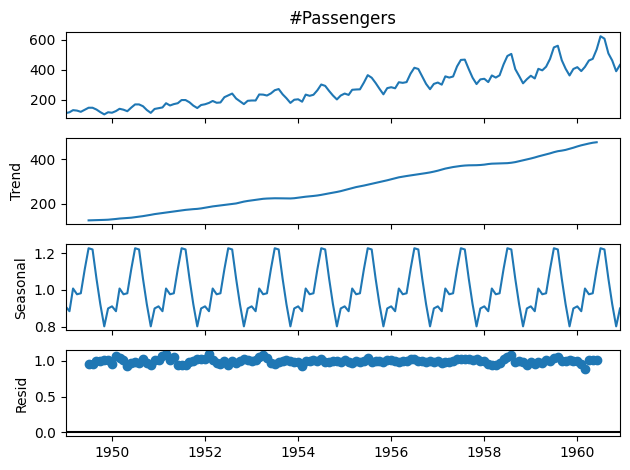

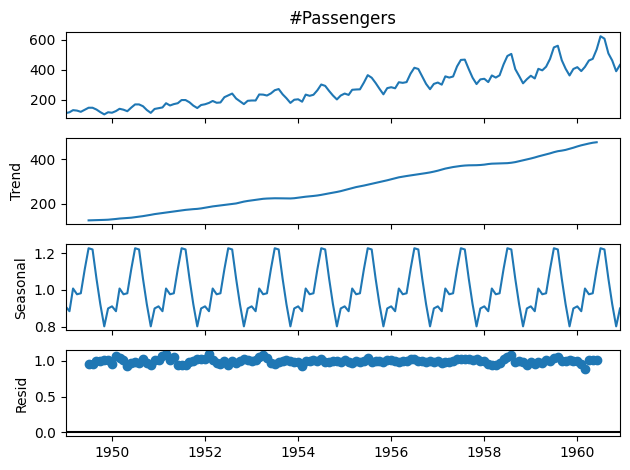

In [6]:
# ETS Decomposition
ets = seasonal_decompose(airline['#Passengers'], model ='multiplicative')
ets.plot()

In [10]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#Load the dataset
airline = pd.read_csv('AirPassengers.csv')

#Check the first few rows and column names
print(airline.head())

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['#Passengers'] ,start_p = 1, start_q = 1,
                            max_p = 3, max_q = 3, m = 12,
                            start_P = 0, seasonal = True,
                            d = None, D = 1, trace = True,
                            error_action ='ignore', # we don't want to know if an order does not work
                            suppress_warnings = True, # we don't want convergence warnings
                            stepwise = True) # set to stepwise

# To print the summary
print(stepwise_fit.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [11]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['#Passengers'],
 order = (0, 1, 1),
 seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

C:\Users\4hackh44\PycharmProjects\machine-learning\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\4hackh44\PycharmProjects\machine-learning\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.012
Date:                            Tue, 29 Oct 2024   AIC                            896.025
Time:                                    15:38:44   BIC                            909.920
Sample:                                01-01-1949   HQIC                           901.667
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2984      0.075     -3.993      0.000      -0.445      -0.152
ar.S.L12       0.7097      0.205      3.467      0.001       0.309       1.111
ar.S.L24       0.2895      0.098      2.951      0.003       0.097       0.482
ma.S.L12      -0.9814      2.093     -0.469      0.639      -5.083       3.120
sigma2        88.1694    168.757      0.522      0.601    -242.588     418.927
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""